# Fraud Detection for Banking 



## Sample Guys 


#### Hergen Meyer 
#### Maitha Alshaali 
#### Nafitha Najeeb 
#### Dominique Duclayan  

## Overview

In this project, we are detecting fraudulent transactions from the Banksim dataset that can be found in the link below. 

Source: https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments


### Feature Description

Source: https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments

* Step: This feature represents the day from the start of simulation. It has 180 steps so simulation ran for virtually 6 months.

* Customer: This feature represents the customer id

* zipCodeOrigin: The zip code of origin/source.

* Merchant: The merchant's id

* zipMerchant: The merchant's zip code

* Age: Categorized age
    * 0: <= 18,
    * 1: 19-25,
    * 2: 26-35,
    * 3: 36-45,
    * 4: 46:55,
    * 5: 56:65,
    * 6: > 65
    * U: Unknown

* Gender: Gender for customer
    * E : Enterprise,
    * F: Female,
    * M: Male,
    * U: Unknown

* Category: Category of the purchase.

* Amount: Amount of the purchase

* Fraud: Target variable which shows if the transaction fraudulent(1) or benign(0)

In [337]:
# (1) Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importing the machine learning model
from sklearn.ensemble import RandomForestClassifier

# Import GridSearchCV to find the model with the best parameters
from sklearn.model_selection import GridSearchCV

# Importing the the functions to measure metrics for the model
from sklearn.metrics import accuracy_score, precision_score, recall_score


import matplotlib.pyplot as plt
import seaborn as sns

import zipfile

#Magic Function 
%matplotlib inline

# Hide warnings 
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


In [338]:
# (2) Import data file(s)
# Use the SQL method from Spark to import the data as DataFrames. 
# See the reference code below. Also see the DataBricks Fraud Detection code as example.
# For basic exploration, you can also use Pandas.
# bs140513_032310.csv
# bsNET140513_032310.csv

# !curl -O https://storage.googleapis.com/datascience-practice/bs140513_032310.csv.zip
# !curl -O https://storage.googleapis.com/datascience-practice/bsNET140513_032310.csv.zip

In [339]:
# (2.a) See the downloaded files
!ls

Project Milestones - DS ML Bootcamp Sep Nov 2021.pdf
bs140513_032310.csv
bs140513_032310.csv.zip
bsNET140513_032310.csv
bsNET140513_032310.csv.zip
csv_collection.zip
fraudDetectionEda.ipynb
fraudDetection_hergen.ipynb
predictions.csv
test_features.csv
test_labels.csv
train_features.csv
train_labels.csv
validation_features.csv
validation_labels.csv
workspace.code-workspace


In [340]:
# (2.b) Unzip the files
# !unzip bs140513_032310.csv.zip
# !unzip bsNET140513_032310.csv.zip

In [341]:
# (2.c) Read transaction data into Pandas DataFrame
dft = pd.read_csv('bs140513_032310.csv')
# (2.d) Read network data into Pandas DataFrame
dff = pd.read_csv('bsNET140513_032310.csv')

# Note: the equivalent method for a PySpark DataFrame is
# df = spark.read.csv()

# General Exploration

In [342]:
# (3) Explore data (for example, see what is categorial and numerical)
# Lets start with analysing / comparing dft and dff
dft.head(3)

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0


In [343]:
# Checking the columns in our dataset
dft.columns

Index(['step', 'customer', 'age', 'gender', 'zipcodeOri', 'merchant',
       'zipMerchant', 'category', 'amount', 'fraud'],
      dtype='object')

In [344]:
dft.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


In [345]:
# No missing data. Great!

In [346]:
# Overview of some statistics
dft.describe()

,step,amount,fraud
count,594643.000000,594643.000000,594643.000000
mean,94.986827,37.890135,0.012108
std,51.053632,111.402831,0.109369
min,0.000000,0.000000,0.000000
25%,52.000000,13.740000,0.000000
50%,97.000000,26.900000,0.000000
75%,139.000000,42.540000,0.000000
max,179.000000,8329.960000,1.000000


In [347]:
# Checking for weird values 
dft['step'].unique

<bound method Series.unique of 0           0
1           0
2           0
3           0
4           0
         ... 
594638    179
594639    179
594640    179
594641    179
594642    179
Name: step, Length: 594643, dtype: int64>

In [348]:
def addlabels (x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+4000, y[i], ha= 'center')
        

In [349]:
def addlabels_1 (x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+4000, y[i], ha= 'center', rotation=90)

Text(0.5, 1.0, 'Fraud frequency')

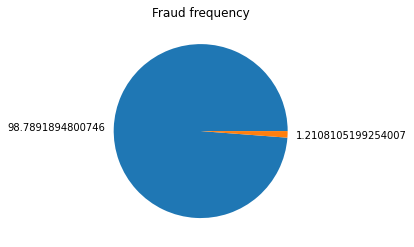

In [350]:
plt.pie(dft['fraud'].value_counts(), labels=[587443*100/(587443+7200), 7200*100/(587443+7200)])
plt.title('Fraud frequency')

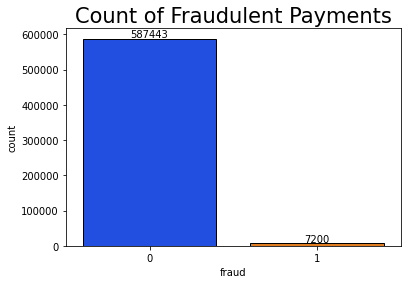

In [351]:
sns.countplot(x="fraud",data=dft,edgecolor="black",palette="bright")
plt.title("Count of Fraudulent Payments",fontsize=21)
addlabels(["0","1"],dft.fraud.value_counts())
plt.show()


In [352]:
fraudCount = dft[['fraud']].value_counts()
print(fraudCount)

# The results show us that there is a total of 587443 non fraudelant transactions 
# that are benign (0) and a total of 7200 fraudelant transactions (1)


fraud
0        587443
1          7200
dtype: int64


In [353]:
# Printing the Number of fraud transactions and non-fraud transactions
print('No. of fraud transactions: {}, No. of non-fraud transactions: {}'.format((dft.fraud == 1).sum(), (dft.fraud == 0).sum()))

No. of fraud transactions: 7200, No. of non-fraud transactions: 587443


In [354]:
percent = dft[['fraud']].value_counts()[1] / len(dft) * 100
percent = percent.round(1)
print("Percentage of fraud cases: {}%".format(percent) )


Percentage of fraud cases: 1.2%


In [355]:
dft.head(1)


,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0


In [356]:
dff.head(1)

,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0


In [357]:
dff[['fraud']].value_counts()


fraud
0        587443
1          7200
dtype: int64

In [358]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Source     594643 non-null  object 
 1   Target     594643 non-null  object 
 2   Weight     594643 non-null  float64
 3   typeTrans  594643 non-null  object 
 4   fraud      594643 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.7+ MB



### I conclude: The DFF dataset can be ignored as it is redundant to DFT


# Feature Analysis

In [359]:
# Fraud cases:
trans_fraud = dft[dft['fraud'] == 1]


In [360]:
# Checking to see the details and number of fraud (1) transactions 
dft.loc[dft.fraud == 1].value_counts()

step  customer       age  gender  zipcodeOri  merchant       zipMerchant  category                 amount   fraud
0     'C1038215695'  '4'  'M'     '28007'     'M2122776122'  '28007'      'es_home'                328.02   1        1
120   'C916694479'   '4'  'F'     '28007'     'M480139044'   '28007'      'es_health'              443.60   1        1
      'C1394467199'  '3'  'M'     '28007'     'M980657600'   '28007'      'es_sportsandtoys'       344.16   1        1
      'C1382187685'  '1'  'F'     '28007'     'M151143676'   '28007'      'es_barsandrestaurants'  134.63   1        1
      'C1294166760'  '3'  'M'     '28007'     'M209847108'   '28007'      'es_wellnessandbeauty'   135.91   1        1
                                                                                                                    ..
59    'C806399525'   '2'  'F'     '28007'     'M980657600'   '28007'      'es_sportsandtoys'       29.22    1        1
                                              'M48013

In [361]:
# Checking to see the details and number of non-fraud (0) transactions 
dft.loc[dft.fraud == 0].value_counts()

step  customer       age  gender  zipcodeOri  merchant       zipMerchant  category                 amount  fraud
0     'C100045114'   '4'  'M'     '28007'     'M348934600'   '28007'      'es_transportation'      35.13   0        1
126   'C1175419672'  '2'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      58.11   0        1
      'C1171622243'  '5'  'M'     '28007'     'M151143676'   '28007'      'es_barsandrestaurants'  35.76   0        1
      'C1173530601'  '2'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      42.77   0        1
      'C1174105749'  '5'  'M'     '28007'     'M348934600'   '28007'      'es_transportation'      21.85   0        1
                                                                                                                   ..
68    'C1687751654'  '3'  'M'     '28007'     'M1823072687'  '28007'      'es_transportation'      60.55   0        1
      'C1687722078'  '2'  'M'     '28007'     'M1823072687'  

In [362]:
# Checking to see the number of fraud (1) transactions and its correlation with age
dft.loc[dft.fraud == 1,'age'].value_counts()

'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
Name: age, dtype: int64

### step

In [363]:
# dft.groupby('step').describe()['fraud']
dft[['step']].value_counts()


step
175     3774
177     3758
152     3746
178     3743
174     3743
        ... 
5       2525
3       2499
2       2462
0       2430
1       2424
Length: 180, dtype: int64

In [364]:
trans_fraud[['step']].value_counts()


step
0       40
113     40
115     40
116     40
117     40
        ..
61      40
62      40
63      40
64      40
179     40
Length: 180, dtype: int64

In [365]:
# I have not clue what step is .... but it seams, each step holds 40 fraud cases....

### customers

In [366]:
# Unique customers:
print(len(np.unique(dft[['customer']].values)))


4112


### gender

In [367]:
dft1 = pd.DataFrame(dft[ 'gender' ].value_counts())
dft1

,gender
'F',324565
'M',268385
'E',1178
'U',515


In [368]:
# And what about all the other gernders ... LBTQ ... ???? ;-)

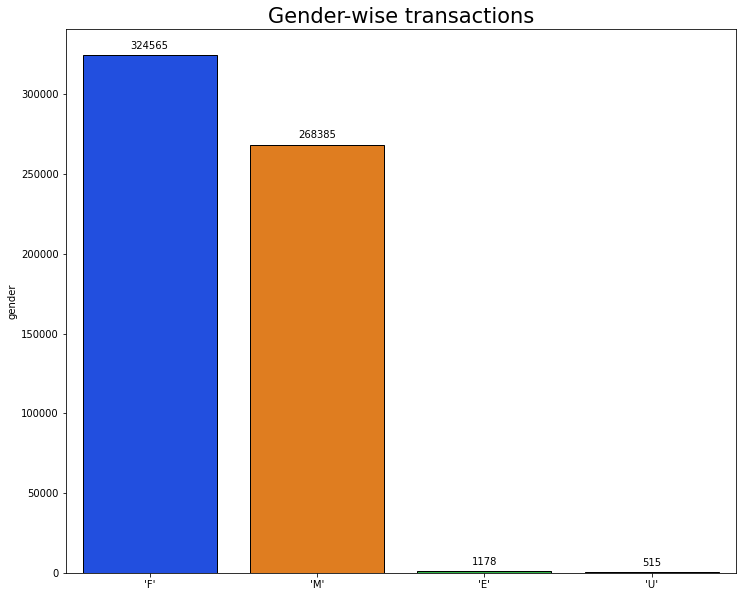

In [369]:
plt.figure(figsize=(12,10))
sns.barplot(dft1.index,dft1.gender,data=dft1,ec="black", palette="bright")
plt.title("Gender-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(dft1.index,dft1.gender)

In [370]:
# I suggest we ignore E and U

### age

In [371]:
trans_fraud[['age']].value_counts()


age
'2'    2344
'3'    1755
'4'    1410
'1'     689
'5'     686
'6'     261
'0'      48
'U'       7
dtype: int64

In [372]:
dft2 = pd.DataFrame(dft['age'].value_counts())
dft2

,age
'2',187310
'3',147131
'4',109025
'5',62642
'1',58131
'6',26774
'0',2452
'U',1178


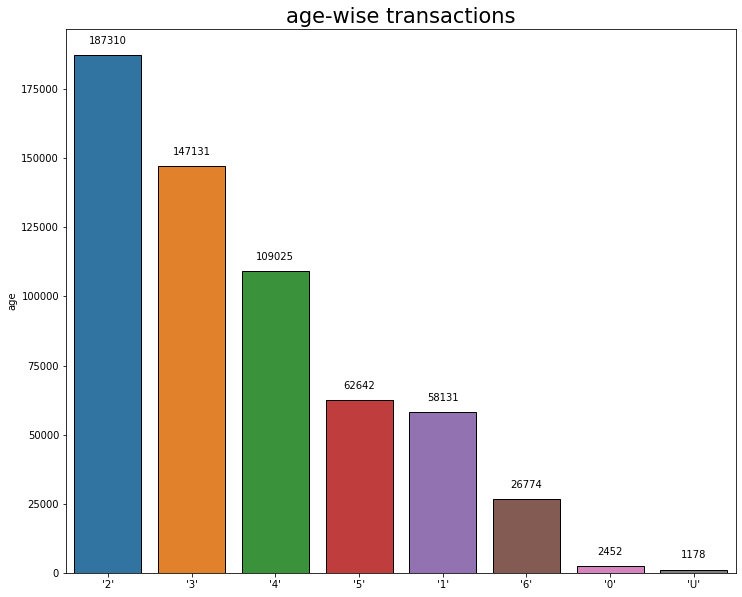

In [373]:
plt.figure(figsize=(12,10))
sns.barplot(dft2.index,dft2.age,data=dft2,ec="black")
plt.title("age-wise transactions",fontsize=21)
plt.xticks(rotation=0)
addlabels(dft2.index,dft2.age)

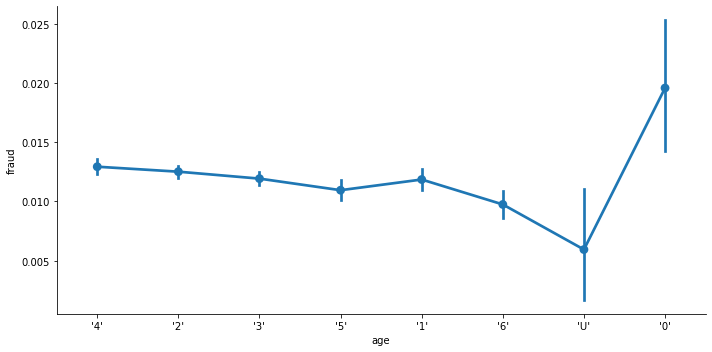

In [374]:


sns.catplot(x='age', y='fraud', data=dft, kind='point', aspect=2)


### zipcodeOri

In [375]:
dft[['zipcodeOri']].value_counts()


zipcodeOri
'28007'       594643
dtype: int64

In [376]:
# We can drop this.

### zipMerchant

In [377]:
dft[['zipMerchant']].value_counts()


zipMerchant
'28007'        594643
dtype: int64

In [378]:
# We can drop this.

### merchant

In [379]:
trans_fraud[['merchant']].value_counts()[:5]


merchant     
'M480139044'     1634
'M980657600'     1472
'M732195782'      518
'M1198415165'     358
'M3697346'        290
dtype: int64

In [514]:
worstMerchant = "M480139044"
worstMerchantDf = dft[dft['merchant'].str.contains(worstMerchant)]
# Note regarding above: I dont understand why I had to use 'contains' rather than "==" but...

worstMerchantDf[['fraud']].value_counts()


fraud
0        1874
1        1634
dtype: int64

In [381]:
# Ok, not always fraud.... ;-)


In [459]:
worstMerchantsFraudDf = worstMerchantDf[worstMerchantDf['fraud'] == 1]



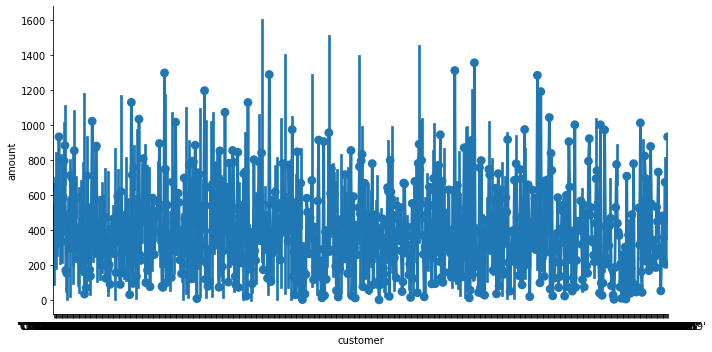

In [458]:
sns.catplot(x='customer', y='amount',
            data=worstMerchantsFraudDf, kind='point', aspect=2)

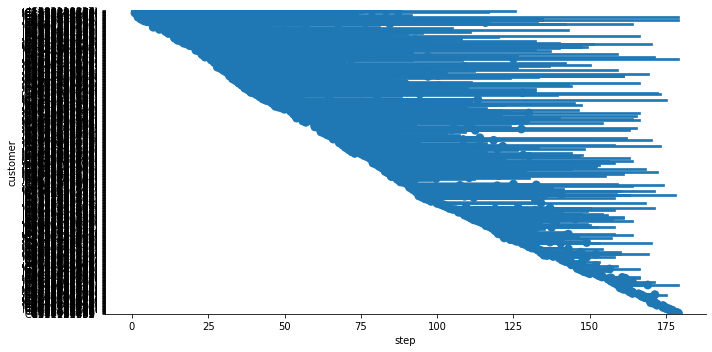

In [434]:
sns.catplot(x='step', y='customer',
            data=worstMerchantsFraudDf, kind='point', aspect=2)


Text(0.5, 1.0, 'Merchant: M480139044')

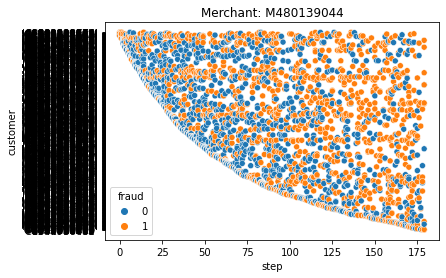

In [516]:
sns.scatterplot(x='step', y='customer', hue='fraud',
                data=worstMerchantDf,).set_title('Merchant: ' + worstMerchant)


In [461]:
fraudedCusts = worstMerchantsFraudDf.groupby('customer').sum()
worstHitCusts = fraudedCusts[fraudedCusts['fraud'] > 20]
worstHitCusts


,step,amount,fraud
customer,,,
'C1175850429',1680,14563.88,29
'C1350963410',2431,10110.74,31
'C1464489812',952,10331.19,23
'C1572610482',917,9907.38,22
'C1817318774',2278,8531.15,23
'C1849046345',1648,10585.97,30
'C1978250683',1601,9247.15,26
'C2004941826',2691,11820.89,29
'C2113737065',1746,10594.09,27


In [477]:
worstHitCustsDf = worstHitCusts.reset_index()
worstHitCustsDf

,customer,step,amount,fraud
0,'C1175850429',1680,14563.88,29
1,'C1350963410',2431,10110.74,31
2,'C1464489812',952,10331.19,23
3,'C1572610482',917,9907.38,22
4,'C1817318774',2278,8531.15,23
5,'C1849046345',1648,10585.97,30
6,'C1978250683',1601,9247.15,26
7,'C2004941826',2691,11820.89,29
8,'C2113737065',1746,10594.09,27
9,'C483912131',2722,13128.94,25


In [479]:
worstHitCustsDf['customer'].values

array(["'C1175850429'", "'C1350963410'", "'C1464489812'", "'C1572610482'",
       "'C1817318774'", "'C1849046345'", "'C1978250683'", "'C2004941826'",
       "'C2113737065'", "'C483912131'", "'C806399525'"], dtype=object)

In [482]:
custTrans = dft[dft['customer'].isin(worstHitCustsDf['customer'].values)]
custTrans


,step,customer,age,gender,merchant,category,amount,fraud
466,0,'C1817318774','2','F','M980657600','es_sportsandtoys',106.29,0
2414,0,'C1175850429','4','M','M480139044','es_health',142.86,1
3794,1,'C1464489812','4','M','M980657600','es_sportsandtoys',397.63,1
3861,1,'C1464489812','4','M','M480139044','es_health',809.46,1
6741,2,'C1572610482','3','F','M480139044','es_health',644.59,1
...,...,...,...,...,...,...,...,...
593179,179,'C2113737065','2','F','M732195782','es_travel',3631.60,1
593927,179,'C1350963410','5','F','M3697346','es_leisure',308.82,1
593964,179,'C1175850429','4','M','M348934600','es_transportation',41.84,0
594096,179,'C1849046345','4','F','M348934600','es_transportation',15.51,0


<AxesSubplot:xlabel='step', ylabel='customer'>

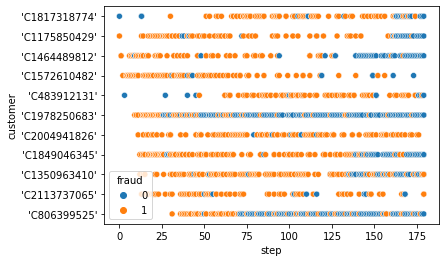

In [492]:
sns.scatterplot(x='step', y='customer', hue='fraud',
            data=custTrans,)


Text(0.5, 1.0, "Customer: 'C1817318774'")

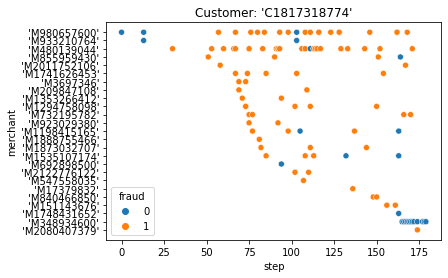

In [506]:
slectCust = "'C1817318774'"
thisCust = dft[dft['customer'] == slectCust]
sns.scatterplot(x='step', y='merchant', hue='fraud',
                data=thisCust,).set_title('Customer: ' + slectCust)


In [509]:
thisScenario = thisCust[thisCust['merchant'] == "'M1535107174'"]
thisScenario


,step,customer,age,gender,merchant,category,amount,fraud
254055,85,'C1817318774','2','F','M1535107174','es_wellnessandbeauty',73.47,1
335458,108,'C1817318774','2','F','M1535107174','es_wellnessandbeauty',274.41,1
351928,113,'C1817318774','2','F','M1535107174','es_wellnessandbeauty',440.71,1
418399,132,'C1817318774','2','F','M1535107174','es_wellnessandbeauty',38.31,0
532745,163,'C1817318774','2','F','M1535107174','es_wellnessandbeauty',54.31,0


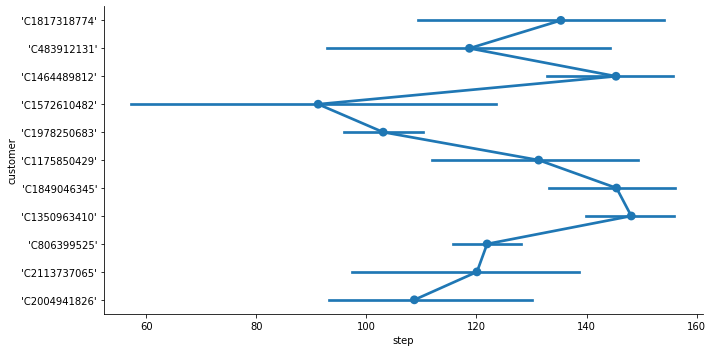

In [487]:
sns.catplot(x='step', y='customer',
            data=custTrans[custTrans['fraud'] == 0], kind='point', aspect=2)


### categories

In [382]:
# Categories by fraud cases:
pd.DataFrame(trans_fraud['category'].value_counts())


,category
'es_sportsandtoys',1982
'es_health',1696
'es_wellnessandbeauty',718
'es_travel',578
'es_hotelservices',548
'es_leisure',474
'es_home',302
'es_hyper',280
'es_otherservices',228
'es_tech',158


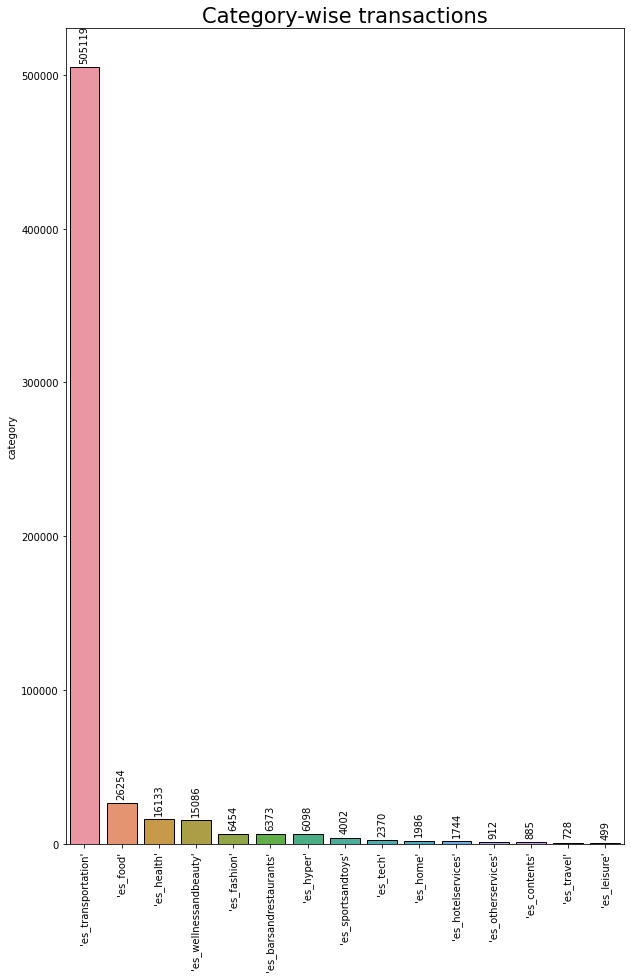

In [383]:
dft3 = pd.DataFrame(dft['category'].value_counts())
plt.figure(figsize=(10,15))
sns.barplot(dft3.index,dft3.category,data=dft3,ec="black")
plt.title("Category-wise transactions",fontsize=21)
plt.xticks(rotation=90)
addlabels_1(dft3.index,dft3.category)


In [384]:
# Note:  The two largest categories (es_transportation and es_food) have absolutely no fraud .....

### amount

In [385]:
dft[['amount']].describe()


,amount
count,594643.000000
mean,37.890135
std,111.402831
min,0.000000
25%,13.740000
50%,26.900000
75%,42.540000
max,8329.960000


In [386]:
trans_fraud[['amount']].describe()


,amount
count,7200.000000
mean,530.926551
std,835.587112
min,0.030000
25%,159.980000
50%,319.175000
75%,548.977500
max,8329.960000


In [387]:
# The higher amount the higher the likelihood of being fraud

# Advanced EDA

### Related cases not identified as fraud

In [388]:
trans_benign = dft[dft['fraud'] == 0]

indicators = []

for i, element in enumerate( trans_fraud):
    case = trans_fraud.iloc[i]
    x = trans_benign[(trans_benign['merchant'] == case['merchant']) & (
        trans_benign['customer'] == case['customer'])]
    indicators.append(x.index)

print(len(indicators))

print (indicators)


10
[Int64Index([17015], dtype='int64'), Int64Index([247317, 369060, 398912], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([98011], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([170375, 210412], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64'), Int64Index([], dtype='int64')]


In [389]:
# not enough cases to be relevant

### Cases with multiple transactions

In [390]:
indicators = []

for i, element in enumerate(trans_fraud):
    case = trans_fraud.iloc[i]
    x = trans_fraud[(trans_fraud['merchant'] == case['merchant']) & (
        trans_fraud['customer'] == case['customer'])]
    indicators.append(x.index)

print(len(indicators))

print(indicators)


10
[Int64Index([88, 853, 3906, 37947], dtype='int64'), Int64Index([89, 245420, 357436, 432259], dtype='int64'), Int64Index([434, 53059], dtype='int64'), Int64Index([435], dtype='int64'), Int64Index([553], dtype='int64'), Int64Index([554], dtype='int64'), Int64Index([   604,   1005,   2362,   9972, 100096, 148706, 213295, 219350,
            232730, 289310, 310188, 350137, 362736, 401290, 402421],
           dtype='int64'), Int64Index([   605,   1004,   5536,  12128,  17660,  20461,  21918,  29605,
             44048,  46954,  50993,  58021,  58406,  60908,  60909,  71699,
             80850,  91297,  94326, 102764, 107053, 111507, 111594, 118670,
            142176, 142177, 173500, 176208, 198625, 214869, 248193, 283599,
            325489, 335847, 346585, 364248, 429699, 429700],
           dtype='int64'), Int64Index([801], dtype='int64'), Int64Index([802, 82502], dtype='int64')]


In [391]:
# not enough cases to be relevant

# => we can drop 'step'

# Conclusions:

In [392]:
# (4) Choose the label and features

# label = 'fraud'



In [393]:
# (5) Feature engineer for data that is
# (a) relevant 
# (b) unique
# (c) correct 
# (d) not missing

irrelevantFeats = [
    'zipMerchant', # as same for all
    'zipcodeOri',  # as same for all
]

# Drop data that is not a,b,c, or d
dft = dft.drop(irrelevantFeats, axis=1, inplace=False)
dft.head()


,step,customer,age,gender,merchant,category,amount,fraud
0,0,'C1093826151','4','M','M348934600','es_transportation',4.55,0
1,0,'C352968107','2','M','M348934600','es_transportation',39.68,0
2,0,'C2054744914','4','F','M1823072687','es_transportation',26.89,0
3,0,'C1760612790','3','M','M348934600','es_transportation',17.25,0
4,0,'C757503768','5','M','M348934600','es_transportation',35.72,0


In [394]:
# Conversion of categorical features into numerical features:

df = dft.copy()  # pd.get_dummies(features, columns=['category', 'gender'])
encoder = LabelEncoder()
df['customer'] = encoder.fit_transform(df['customer'])
df['age'] = encoder.fit_transform(df['age'])
df['gender'] = encoder.fit_transform(df['gender'])
df['merchant'] = encoder.fit_transform(df['merchant'])
df['category'] = encoder.fit_transform(df['category'])
df.head()


,step,customer,age,gender,merchant,category,amount,fraud
0,0,210,4,2,30,12,4.55,0
1,0,2753,2,2,30,12,39.68,0
2,0,2285,4,1,18,12,26.89,0
3,0,1650,3,2,30,12,17.25,0
4,0,3585,5,2,30,12,35.72,0


In [395]:
# Set features:
label = df['fraud']
features = df.drop(['fraud'], axis=1)

In [396]:

# Reduce dimensions of your features

# Correlation is unlcear therefore no further reduction.

In [397]:
# (6) Confirm data is ready with further exploratory analysis
features.head()


,step,customer,age,gender,merchant,category,amount
0,0,210,4,2,30,12,4.55
1,0,2753,2,2,30,12,39.68
2,0,2285,4,1,18,12,26.89
3,0,1650,3,2,30,12,17.25
4,0,3585,5,2,30,12,35.72


In [401]:
# (7) Training, Testing (and/or Validation) data split: 60/20/20

trainF, testF, trainL, testL = train_test_split(
    features, label, test_size=0.4, random_state=42)

testF, valF, testL, valL = train_test_split(
    testF, testL, test_size=0.5, random_state=42)


In [399]:
# (8) Training the Machine Learning Model (i.e, Fitting the Model)


In [402]:
# Instantiate the model and set the hyperparameters

rfModel = RandomForestClassifier()

hyperparameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, ]  # 20, None
}


# GridSearchCV will search and rank the models according their parameters
gridSearch = GridSearchCV(rfModel, hyperparameters, cv=5)

# .fit() will have the model, rfModel, learn the parameters of the features
gridSearch.fit(trainF, trainL.values.ravel())


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 10], 'n_estimators': [5, 50, 100]})

In [403]:
# (9a) Evaluate the model metrics for Training data

def printResults(gridSearchResults):
    
    print( 'Best ML Hyperparameters: {}\n'.format(gridSearchResults.best_params_) )

    means = gridSearchResults.cv_results_['mean_test_score']
    stnDvs = gridSearchResults.cv_results_['std_test_score']

    for mean, stnDvs, parameters in zip( means, stnDvs, gridSearchResults.cv_results_['params'] ):
        print(
            '{} (+/-{}) for {}'.format(
                round(mean, 3),
                round(stnDvs*2, 3),
                parameters
            ) 
        )

printResults(gridSearch)


Best ML Hyperparameters: {'max_depth': 10, 'n_estimators': 50}

0.992 (+/-0.003) for {'max_depth': 2, 'n_estimators': 5}
0.989 (+/-0.001) for {'max_depth': 2, 'n_estimators': 50}
0.989 (+/-0.001) for {'max_depth': 2, 'n_estimators': 100}
0.995 (+/-0.0) for {'max_depth': 10, 'n_estimators': 5}
0.995 (+/-0.001) for {'max_depth': 10, 'n_estimators': 50}
0.995 (+/-0.001) for {'max_depth': 10, 'n_estimators': 100}


In [404]:
# Determine best 3:


rfModels = []

for i in range(3):

    p = gridSearch.cv_results_['params'][
        np.argsort(
            np.array(gridSearch.cv_results_['rank_test_score'])
        )[i]
    ]

    rfModels.append(
        RandomForestClassifier(
            n_estimators=p['n_estimators'], max_depth=p['max_depth']
        ).fit(trainF, trainL.values.ravel())
    )

print(rfModels)


[RandomForestClassifier(max_depth=10, n_estimators=50), RandomForestClassifier(max_depth=10), RandomForestClassifier(max_depth=10, n_estimators=5)]


In [405]:
# (9b) Evaluate the model metrics for Validation data

# Iterate over the top 3 models and have each predict the label
# then, compare the metric for each model to find the best of 3.

for rfML in rfModels:  # ( rfModel1, rfModel2, rfModel3):
    predictedLabells = rfML.predict(valF)

    # Find the metric for the model: a) acuracy,b) precision, and c) recall
    accuracy = round(accuracy_score(valL, predictedLabells), 3)
    precision = round(precision_score(valL, predictedLabells), 3)
    recall = round(recall_score(valL, predictedLabells), 3)

    print(
        'Max depth: {} and Estimators: {}'.format(
            rfML.max_depth, rfML.n_estimators)
    )

    print(
        'Accuracy: {}, Precision: {}, Recall: {}'.format(
            accuracy, precision, recall)
    )
    print('------------------------------')


Max depth: 10 and Estimators: 50
Accuracy: 0.996, Precision: 0.904, Recall: 0.699
------------------------------
Max depth: 10 and Estimators: 100
Accuracy: 0.996, Precision: 0.909, Recall: 0.7
------------------------------
Max depth: 10 and Estimators: 5
Accuracy: 0.995, Precision: 0.907, Recall: 0.668
------------------------------


In [415]:
rfModels[2]


RandomForestClassifier(max_depth=10, n_estimators=5)

In [417]:
# (10) Evaluate the model metris for Testing data

rfModel = rfModels[1]

# Predict for best model:
predictedLabells = rfModel.predict(testF)

# Find the metric for the model: a) acuracy,b) precision, and c) recall
accuracy = round(accuracy_score(testL, predictedLabells), 3)
precision = round(precision_score(testL, predictedLabells), 3)
recall = round(recall_score(testL, predictedLabells), 3)

print(
    'Max depth: {} and Estimators: {}'.format(
        rfModel.max_depth, rfModel.n_estimators)
)

print(
    'Accuracy: {}, Precision: {}, Recall: {}'.format(
        accuracy, precision, recall)
)
print('------------------------------')


Max depth: 10 and Estimators: 100
Accuracy: 0.996, Precision: 0.901, Recall: 0.731
------------------------------


In [427]:
# (11) Use the model for prediction

def convertFeature(fLabel):
    for index in testFeaturesDF.index:
        value = newDataFeaturesDF[fLabel].loc[index]
        firstIndex = dft[dft[fLabel] ==
                         "'{}'".format(value)].first_valid_index()
        if firstIndex or firstIndex == 0:
            testFeaturesDF.at[index, fLabel] = df.loc[firstIndex][fLabel].astype(
                'int64', copy=False)
        else:
            testFeaturesDF.at[index, fLabel] = 0


newDataFeatures = {
    "step": [0,0,0],
    "customer": ["Hergen", "Nafitha", "Maitha"],
    "age":["3","3","2"],
    "gender":["M","F","F"],
    "merchant": ["M480139044", "M480139044", "Amazon"],
    "category": ["es_health", "es_health", "es_sportsandtoys"],
    "amount":[300, 200, 1000000],
}

newDataFeaturesDF = pd.DataFrame(data=newDataFeatures)

testFeaturesDF = newDataFeaturesDF.copy() # .drop(irrelevantFeats, axis=1, inplace=False)

convertFeature('customer')
convertFeature('age')
convertFeature('gender')
convertFeature('category')
convertFeature('merchant')

newDataFeaturesDF['fraud'] = rfModel.predict(testFeaturesDF)

newDataFeaturesDF.head()


,step,customer,age,gender,merchant,category,amount,fraud
0,0,Hergen,3,M,M480139044,es_health,300,1
1,0,Nafitha,3,F,M480139044,es_health,200,0
2,0,Maitha,2,F,Amazon,es_sportsandtoys,1000000,0


In [408]:
# (12) Write final predicted data  (e.g, to CSV or JSON, etc.)

pd.DataFrame(newDataFeaturesDF).to_csv('./predictions.csv', index=False)
